In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# import plt
import matplotlib.pyplot as plt

from matplotlib import rcParams

In [2]:
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))

def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """

    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    information_gain = target_entropy - feature_remaining_impurity

    return(information_gain)

In [3]:
features_pad = ['Valence', 'Valence_nwords', 'Arousal', 'Arousal_nwords', 'Dominance', 'Dominance_nwords', 
                'Longing_GALC', 'Lust_GALC', 'Arousal_GI',
                 'Wlbgain_Lasswell', 
                'Wlbloss_Lasswell', 'Wlbphys_Lasswell', 'Wlbpsyc_Lasswell', 'Wlbtot_Lasswell',
                'hu_liu_prop', 'polarity']

features_emotion = ['Admiration/Awe_GALC', 'Amusement_GALC', 'Anger_GALC', 'Anxiety_GALC', 
                    'Boredom_GALC', 'Contempt_GALC', 'Contentment_GALC', 'Desperation_GALC', 
                    'Disappointment_GALC', 'Disgust_GALC', 'Dissatisfaction_GALC', 'Envy_GALC', 'Fear_GALC', 
                    'Feelinglove_GALC', 'Guilt_GALC', 'Happiness_GALC', 'Hatred_GALC', 
                    'Hope_GALC', 'Interest/Enthusiasm_GALC', 'Irritation_GALC', 'Jealousy_GALC', 
                    'Joy_GALC', 'Pleasure/Enjoyment_GALC', 'Pride_GALC', 'Relaxation/Serenity_GALC', 'Relief_GALC', 
                    'Sadness_GALC', 'Shame_GALC', 'Tension/Stress_GALC', 'Positive_GALC', 'Negative_GALC',
                   'Negativ_GI', 'Ngtv_GI', 'Hostile_GI', 'No_GI', 'Pain_GI', 'Fail_GI', 'Negate_GI',
                   'Positiv_GI', 'Pstv_GI', 'Pleasur_GI', 'Yes_GI', 'Feel_GI', 'Emot_GI',
                   'Affloss_Lasswell', 'Wlbloss_Lasswell', 'Endslw_Lasswell', 'Anomie_Lasswell', 'Negaff_Lasswell', 
                    'Notlw_Lasswell', 'Affoth_Lasswell', 'Afftot_Lasswell', 'Meanslw_Lasswell',
                   'Affgain_Lasswell', 'Posaff_Lasswell', 
                    'hu_liu_pos_perc', 'hu_liu_neg_perc', 'hu_liu_pos_nwords', 'hu_liu_neg_nwords',
                   'Anger_EmoLex', 'Disgust_EmoLex', 'Fear_EmoLex', 'Negative_EmoLex', 'Sadness_EmoLex', 'Joy_EmoLex', 'Positive_EmoLex',
                    'Surprise_EmoLex', 'Anticipation_EmoLex', 'joy_component', 'fear_and_digust_component', 'Sv_GI',
                    'pleasantness', 'sensitivity', 'vader_negative', 'vader_neutral', 'vader_compound', 'vader_positive']

sentiment = ['negative_adjectives_component', 'positive_adjectives_component', 'polarity_nouns_component', 
             'polarity_verbs_component', 'virtue_adverbs_component', 'positive_nouns_component', 
            'positive_verbs_component', 'well_being_component', 'Surelw_Lasswell', 'If_Lasswell']


mood = ['Virtue_GI', 'Vice_GI',
       'attention', 'aptitude', 'affect', 'posemo',
       'negemo', 'anx', 'anger', 'sad']

social = ['Beingtouched_GALC', 'Compassion_GALC', 'Gratitude_GALC', 'Humility_GALC', 'Surprise_GALC', 'Submit_GI', 
                   'Trust_EmoLex', 'Affpt_Lasswell', 'Wlbpt_Lasswell', 'Affil_GI', 'Role_GI', 'Coll_GI', 'Powcon_Lasswell', 'Powcoop_Lasswell', 
                   'Work_GI', 'Ritual_GI', 'Socrel_GI', 'Race_GI', 'Kin_2_GI', 'Male_GI', 'Female_GI', 'Nonadlt_GI',
                   'Hu_GI', 'Social_GI', 'Rel_GI', 'Intrj_GI', 'Ipadj_GI', 'Indadj_GI', 'Powaupt_Lasswell', 'Powpt_Lasswell', 'Powdoct_Lasswell', 'Powauth_Lasswell', 
                   'social_order_component', 'affect_friends_and_family_component', 'respect_component', 'trust_verbs_component', 'Ptlw_Lasswell', 'Wltpt_Lasswell',
                    'Active_GI', 'Passive_GI',  'Rspgain_Lasswell', 'Rsploss_Lasswell', 'Rspoth_Lasswell', 'Rsptot_Lasswell',
                    'Rcethic_Lasswell', 'Rcloss_Lasswell', 'Rcgain_Lasswell',
                   'social',
       'family', 'friend', 'female', 'male']

syntactic = ['Self_GI', 'Our_GI', 'You_GI', 'Name_GI', 'politeness_component', 'formlw_Lasswell', 'nwords',
          'Comnobj_GI', 'Comform_GI', 'Com_GI', 'WC', 'Analytic',
       'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr',
       'Dic', 'function', 'pronoun', 'ppron', 'i',
       'we', 'you', 'shehe', 'they', 'ipron',
       'article', 'prep', 'auxverb', 'adverb', 'conj',
       'negate', 'verb', 'adj', 'compare', 'interrog',
       'number', 'quant', 'informal', 'swear', 'netspeak', 'assent',
       'nonflu', 'filler', 'AllPunc', 'Period',
       'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam',
       'Dash', 'Quote', 'Apostro', 'Parenth',
       'OtherP'] + ['readability_Kincaid',
 'readability_ARI',
 'readability_Coleman-Liau',
 'readability_FleschReadingEase',
 'readability_GunningFogIndex',
 'readability_LIX',
 'readability_SMOGIndex',
 'readability_RIX',
 'readability_DaleChallIndex',
 'readability_characters_per_word',
 'readability_syll_per_word',
 'readability_words_per_sentence',
 'readability_sentences_per_paragraph',
 'readability_type_token_ratio',
 'readability_directspeech_ratio',
 'readability_characters',
 'readability_syllables',
 'readability_words',
 'readability_wordtypes',
 'readability_sentences',
 'readability_paragraphs',
 'readability_long_words',
 'readability_complex_words',
 'readability_complex_words_dc',
 'readability_tobeverb',
 'readability_auxverb',
 'readability_conjunction',
 'readability_pronoun',
 'readability_preposition',
 'readability_nominalization',
 'readability_interrogative',
 'readability_article',
 'readability_subordination']

topic = ['Goal_GI', 'Try_GI', 'Means_GI', 'Persist_GI', 'Complet_GI', 'Finish_GI',
          'Exert_GI', 'Fetch_GI', 'Ovrst_GI', 'Undrst_GI', 'Causal_GI', 'Ought_GI', 'Powoth_Lasswell', 
                'Powtot_Lasswell', 'Wlttran_Lasswell', 'Wltoth_Lasswell', 'Wlttot_Lasswell', 
          'Eval_2_GI', 'Eval_GI', 'Iav_GI', 'Ani_GI', 'Aquatic_GI', 'Land_GI', 'Sky_GI', 'Object_GI', 'Tool_GI',
            'Food_GI', 'Vehicle_GI', 'Bldgpt_GI', 'Natobj_GI', 'Bodypt_GI', 'Natrpro_GI', 'Color_GI',
         'Increas_GI', 'Decreas_GI', 'Quality_GI', 'Quan_GI', 'Numb_GI', 'Ord_GI', 'Card_GI', 'Freq_GI', 'Dist_GI',
         'Place_GI', 'Region_GI', 'Route_GI', 'Begin_GI', 'Stay_GI', 'Rise_GI', 'Travel_GI', 'Fall_GI', 'Time_2_GI',
         'Time_GI', 'Space_GI', 'Pos_GI', 'Dim_GI', 'Doctrin_GI', 'Econ_2_GI', 'Exch_GI', 'Econ_GI', 'Legal_GI',
         'Milit_GI', 'Polit_2_GI', 'Polit_GI', 'Relig_GI', 'Say_GI',
         'Academ_GI', 'Exprsv_GI', 'Need_GI', 'Vary_GI', 'Think_GI', 'Know_GI', 'Perceiv_GI', 'Compare_GI', 'Solve_GI',
        'Abs_2_GI', 'Abs_GI', 'action_component', 'economy_component', 'certainty_component', 'failure_component',
         'Rcrelig_Lasswell', 'Strong_GI', 'Power_GI', 'Weak_GI', 'Powgain_Lasswell', 
                'Powloss_Lasswell', 'Powends_Lasswell', 'Powaren_Lasswell', 
          'Rcends_Lasswell', 'Rctot_Lasswell', 'Sklpt_Lasswell', 'Skloth_Lasswell', 'Skltot_Lasswell', 'Nation_Lasswell', 'Dav_GI',  
        'Enlgain_Lasswell', 'Enlloss_Lasswell', 'Enlends_Lasswell', 'Enlpt_Lasswell', 'Enloth_Lasswell', 'Enltot_Lasswell', 'Sklasth_Lasswell', 'Timespc_Lasswell',
         'objects_component',
         'cogproc', 'insight', 'cause', 'discrep',
         'Trngain_Lasswell', 'Trnloss_Lasswell', 'Tranlw_Lasswell', 'Arenalw_Lasswell', 
       'tentat', 'certain', 'differ', 'percept',
       'see', 'hear', 'feel', 'bio', 'body',
       'health', 'sexual', 'ingest', 'drives',
       'affiliation', 'achieve', 'power', 'reward',
       'risk', 'focuspast', 'focuspresent', 'focusfuture',
       'relativ', 'motion', 'space', 'time', 'work',
       'leisure', 'home', 'money', 'relig', 'death']


total = features_pad + features_emotion + mood  + sentiment + social + syntactic + topic
affective = features_pad + features_emotion + mood  + sentiment



In [4]:
datasets = ['depression_severity', 'dep_sign']


In [5]:
split_criteria = 'gini'

# create dataframe to store features along with their information gain
results = pd.DataFrame(columns=['dataset', 'feature_name', 'feature_ig', 'feature_set'])

for dataset in datasets:

    df = pd.read_csv('../data/processed/' + dataset + '.csv').drop(['index', 'split'], axis=1, errors='ignore')
    
     # remove high correlated features
    # Create correlation matrix
    corr_matrix = df[total].corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    dropped_columns = to_drop
    non_dropped_columns = [x for x in df[total].columns if x not in dropped_columns]
    

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)
    
    for feature in df[non_dropped_columns].columns:

        feature_info_gain = comp_feature_information_gain(df, 'label', feature, split_criteria)

        # get feature set
        if feature in affective:
            feature_set = 'affective'
        elif feature in social:
            feature_set = 'social'
        elif feature in syntactic:
            feature_set = 'syntactic'
        elif feature in topic:
            feature_set = 'topic'
        else:
            feature_set = 'unknown'

        # concat to results dataframe
        results = pd.concat([results, pd.DataFrame([[dataset, feature, feature_info_gain, feature_set]], 
                                                   columns=['dataset', 'feature_name', 'feature_ig', 'feature_set'])], axis=0)

In [6]:
results.to_csv('results/feature_information_gain.csv', index=False)

In [32]:
results.groupby(['feature_set', 'dataset']).describe()

feature_ig                                    \
                                     count      mean       std           min   
feature_set dataset                                                            
affective   depression_ltedi         107.0  0.006295  0.007130  6.970910e-07   
            depression_severity      108.0  0.024765  0.032367  7.190036e-06   
social      depression_ltedi          52.0  0.007084  0.005884  1.839509e-04   
            depression_severity       49.0  0.008546  0.016579  1.408802e-08   
syntactic   depression_ltedi          69.0  0.013370  0.022046  4.405077e-05   
            depression_severity       75.0  0.011953  0.024642  6.681108e-08   
topic       depression_ltedi         142.0  0.008628  0.006850  3.801727e-07   
            depression_severity      142.0  0.005309  0.008790  8.924936e-06   

                                                                         
                                      25%       50%       75%       max  
feature_set dataset                                                      
affective   depression_ltedi     0.001151  0.003400  0.009750  0.037905  
            depression_severity  0.001414  0.009079  0.040424  0.133771  
social      depression_ltedi     0.001628  0.005842  0.011951  0.022954  
            depression_severity  0.002088  0.003740  0.007393  0.099701  
syntactic   depression_ltedi     0.000656  0.003860  0.013622  0.086905  
            depression_severity  0.001293  0.003313  0.012337  0.144350  
topic       depression_ltedi     0.003347  0.007365  0.013239  0.043394  
            depression_severity  0.000419  0.001609  0.006025  0.060687

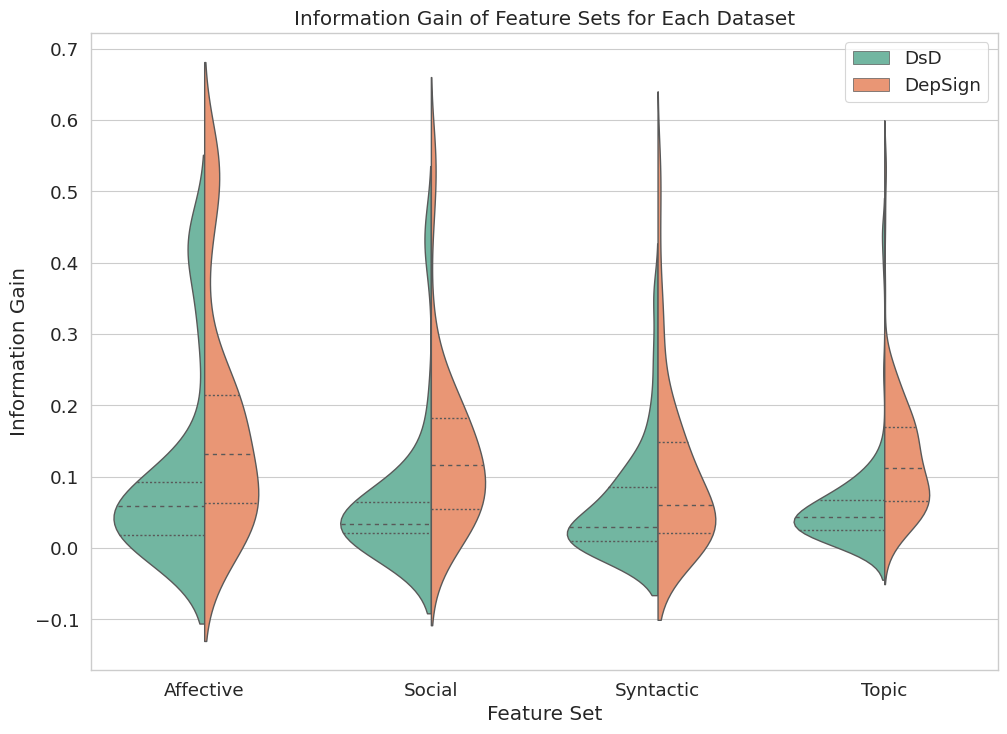

In [6]:
# plot using seaborn violinplots with the information gain of each feature set for each dataset
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("paper", font_scale=1.5)
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

ax = sns.violinplot(x="feature_set", y="feature_ig", hue="dataset", data=results, split=True, inner="quartile", linewidth=1, facet_kws={'legend_out': True})
ax.set_xlabel("Feature Set")
ax.set_ylabel("Information Gain")
ax.set_xticklabels(['Affective', 'Social', 'Syntactic', 'Topic'])
# replace labels
ax.get_legend().set_title('')
new_labels = ['DsD', 'DepSign']
for t, l in zip(ax.get_legend().texts, new_labels):
    t.set_text(l)
ax.set_title("Information Gain of Feature Sets for Each Dataset")
plt.savefig('results/feature_information_gain_both.pdf', dpi=300)